<a href="https://colab.research.google.com/github/mateoseveri/Sentiment-Analysis-NLTK/blob/main/musitiants_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis for musical artists who committed suicide using NLTK technique.


**By Mateo Severi: https://www.linkedin.com/in/mateo-severi-59b665103/**

**Disclaimer: Here we do not seek to draw conclusions about suicide, nor if suicide is predictable by analyzing songs of musical artists, because suicide and mental health are complex issues that require a psychiatric and psychological approach that are beyond my knowledge. We simply want to show a sentiment analysis using NLTK (Natural language processing) technique, and obtain insights from age groups that committed suicide.**

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
plt.style.use('ggplot')

import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

Reading csv

Installing packages in case you don't have it

# VADER Seniment Scoring¶

In [2]:
musitians = pd.read_excel(r"/content/Copy of Artist Database.xlsx")
musitians.head(5)

,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics
0,Stuart Adamson,43,Scared to Dance,No,The skids,1979.0,Your face in the corner\nLike some statue of g...
1,Stuart Adamson,43,Days in Europa,No,The skids,1979.0,From the corner\nI bled with dismay\nSight of ...
2,Stuart Adamson,43,The Absolute Game,No,The skids,1979.0,"Mission is a gambler\nThe Wager, the one card ..."
3,Stuart Adamson,43,The Crossing,No,Big Country,1983.0,Maps on the back of your hands\nPoint to the c...
4,Stuart Adamson,43,Steeltown,No,Big Country,1983.0,Here I stand with my own kin\nAt the end of ev...


In [3]:
musitians.reset_index(drop=False, inplace=True)

In [4]:
musitians = musitians.dropna(subset=['Lyrics'])
musitians

,index,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics
0,0,Stuart Adamson,43,Scared to Dance,No,The skids,1979.0,Your face in the corner\nLike some statue of g...
1,1,Stuart Adamson,43,Days in Europa,No,The skids,1979.0,From the corner\nI bled with dismay\nSight of ...
2,2,Stuart Adamson,43,The Absolute Game,No,The skids,1979.0,"Mission is a gambler\nThe Wager, the one card ..."
3,3,Stuart Adamson,43,The Crossing,No,Big Country,1983.0,Maps on the back of your hands\nPoint to the c...
4,4,Stuart Adamson,43,Steeltown,No,Big Country,1983.0,Here I stand with my own kin\nAt the end of ev...
...,...,...,...,...,...,...,...,...
737,737,Avicii,28,Lonely Together,Yes,AVĪCI (01),2017.0,It's you and your world\nAnd I'm caught in the...
738,738,Avicii,28,You Be Love,Yes,AVĪCI (01),2017.0,You can be the potter\nI'll be the clay\nYou c...
739,739,Avicii,28,Without You,Yes,AVĪCI (01),2017.0,You said that we would always be\nWithout you ...
740,740,Avicii,28,What Would I Change It To,Yes,AVĪCI (01),2017.0,Steady yourself even though you've only been f...


In [5]:


from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(musitians.iterrows(), total=len(musitians)):
    text = row['Lyrics']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)



vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(musitians, how='left')

print(vaders.head())
print(vaders['Album'].unique())
print(vaders.groupby('Album')['compound'].mean().sort_values(ascending = False))
print(vaders.groupby('Album')['compound'].std().sort_values(ascending = False))

  0%|          | 0/731 [00:00<?, ?it/s]

   index    neg    neu    pos  compound          Artist  Years lived  \
0      0  0.255  0.617  0.128   -0.9726  Stuart Adamson           43   
1      1  0.173  0.705  0.123   -0.9327  Stuart Adamson           43   
2      2  0.122  0.671  0.207    0.9669  Stuart Adamson           43   
3      3  0.023  0.918  0.059    0.8979  Stuart Adamson           43   
4      4  0.097  0.812  0.090   -0.3956  Stuart Adamson           43   

                Song Personal  Song        Album  Release date  \
0    Scared to Dance             No    The skids        1979.0   
1     Days in Europa             No    The skids        1979.0   
2  The Absolute Game             No    The skids        1979.0   
3       The Crossing             No  Big Country        1983.0   
4          Steeltown             No  Big Country        1983.0   

                                              Lyrics  
0  Your face in the corner\nLike some statue of g...  
1  From the corner\nI bled with dismay\nSight of ...  
2  Mi

In [6]:
vaders

,index,neg,neu,pos,compound,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics
0,0,0.255,0.617,0.128,-0.9726,Stuart Adamson,43,Scared to Dance,No,The skids,1979.0,Your face in the corner\nLike some statue of g...
1,1,0.173,0.705,0.123,-0.9327,Stuart Adamson,43,Days in Europa,No,The skids,1979.0,From the corner\nI bled with dismay\nSight of ...
2,2,0.122,0.671,0.207,0.9669,Stuart Adamson,43,The Absolute Game,No,The skids,1979.0,"Mission is a gambler\nThe Wager, the one card ..."
3,3,0.023,0.918,0.059,0.8979,Stuart Adamson,43,The Crossing,No,Big Country,1983.0,Maps on the back of your hands\nPoint to the c...
4,4,0.097,0.812,0.090,-0.3956,Stuart Adamson,43,Steeltown,No,Big Country,1983.0,Here I stand with my own kin\nAt the end of ev...
...,...,...,...,...,...,...,...,...,...,...,...,...
726,737,0.269,0.714,0.016,-0.9986,Avicii,28,Lonely Together,Yes,AVĪCI (01),2017.0,It's you and your world\nAnd I'm caught in the...
727,738,0.031,0.704,0.265,0.9977,Avicii,28,You Be Love,Yes,AVĪCI (01),2017.0,You can be the potter\nI'll be the clay\nYou c...
728,739,0.059,0.781,0.160,0.9736,Avicii,28,Without You,Yes,AVĪCI (01),2017.0,You said that we would always be\nWithout you ...
729,740,0.105,0.821,0.074,-0.7912,Avicii,28,What Would I Change It To,Yes,AVĪCI (01),2017.0,Steady yourself even though you've only been f...


In [7]:
vaders.describe(include='all')

,index,neg,neu,pos,compound,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics
count,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731,624,703,711.000000,731
unique,NaN,NaN,NaN,NaN,NaN,50,NaN,712,4,253,NaN,606
top,NaN,NaN,NaN,NaN,NaN,Kurt Cobain,NaN,Without You,No,Incesticide,NaN,No Lyrics
freq,NaN,NaN,NaN,NaN,NaN,65,NaN,3,350,15,NaN,72
mean,371.915185,0.194019,0.684213,0.121767,0.135409,NaN,40.701778,NaN,NaN,NaN,1989.886076,NaN
std,214.116652,0.221978,0.185267,0.100520,0.811596,NaN,13.121612,NaN,NaN,NaN,18.799302,NaN
min,0.000000,0.000000,0.312000,0.000000,-0.999600,NaN,20.000000,NaN,NaN,NaN,1947.000000,NaN
25%,187.500000,0.052000,0.624000,0.045000,-0.735000,NaN,28.000000,NaN,NaN,NaN,1974.000000,NaN
50%,371.000000,0.108000,0.734000,0.110000,0.102700,NaN,43.000000,NaN,NaN,NaN,1991.000000,NaN
75%,558.500000,0.205000,0.810500,0.177000,0.978000,NaN,49.000000,NaN,NaN,NaN,2006.000000,NaN


## Sentiment score visualization for each artist

In [8]:
artists = vaders['Artist'].unique()

fig = None

for artist in artists:
    songs_artist = vaders[vaders['Artist'] == artist]

    songs_artist = songs_artist.dropna(subset=['Release date'])

    songs_artist['Release date'] = songs_artist['Release date'].astype(int)

    grouped_data = songs_artist.groupby('Release date')['compound'].agg(['mean', 'std']).reset_index()

    fig = px.bar(grouped_data, x='Release date', y='mean',error_y='std', title=f'Media del Compuesto para {artist}',
                     labels={'Release date': 'Fecha de Lanzamiento', 'compound': 'Media del Compuesto'})
    fig.update_layout(width=600, height=500)

    fig.show()

In [9]:
vaders['Years lived'].unique()

array([43, 34, 48, 33, 52, 22, 50, 54, 71, 36, 49, 41, 27, 37, 46, 25, 45,
       77, 47, 20, 51, 64, 31, 35, 67, 55, 30, 44, 23, 28])

#### Distribution of songs by artists for same years lived

In [10]:
conteo_years_lived = vaders['Years lived'].value_counts()


df_conteo_years_lived = pd.DataFrame({'Years lived': conteo_years_lived.index, 'Number of Songs': conteo_years_lived.values})
df_conteo_years_lived

,Years lived,Number of Songs
0,27,87
1,43,70
2,52,64
3,48,53
4,28,43
5,37,32
6,25,31
7,33,29
8,55,27
9,49,22


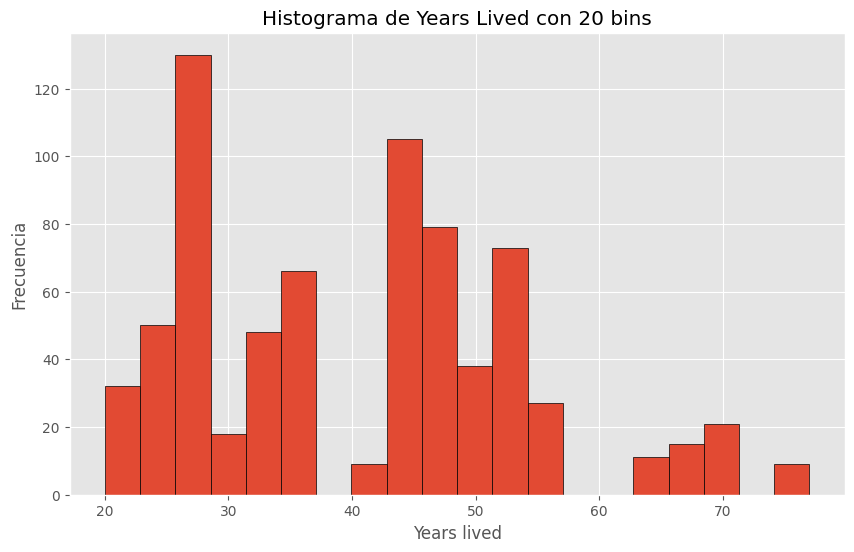

In [11]:
plt.figure(figsize=(10, 6))

plt.hist(vaders['Years lived'], bins=20, edgecolor='black')
plt.title('Histograma de Years Lived con 20 bins')
plt.xlabel('Years lived')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

**Living more doesn´t mean composing more songs. Depends on artist´s personality. Seems to be a bimodal distribution, where a clear group of artists are young between 20 and 34, and the other big group is more adults between 40 and 54.**

In [12]:
vaders['Artist'].nunique()

50

In [13]:
conteo_artistas_edad = vaders.groupby('Years lived')['Artist'].nunique().reset_index()

conteo_artistas_edad.columns = ['Years lived', 'Count of Unique Artists']

conteo_artistas_edad



,Years lived,Count of Unique Artists
0,20,1
1,22,1
2,23,1
3,25,3
4,27,3
5,28,1
6,30,1
7,31,1
8,33,3
9,34,3


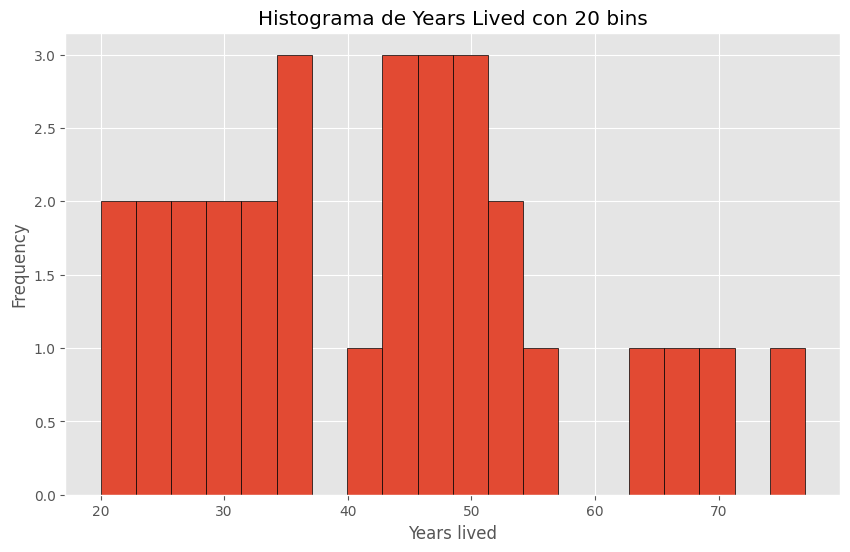

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(conteo_artistas_edad['Years lived'], bins=20, edgecolor='black')
plt.title('Histograma de Years Lived con 20 bins')
plt.xlabel('Years lived')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Practically same bimodal distribution as the previous figure shown applies to distribution of artists by years lived. 10 artists commited suicide and lived bewteen 25 and 39 (or 10 also lived between 20 and 34) and 12 artists lived between 40 and 54). Therefore, seems logical to study specifically these two groups, as the others lack data**

In [15]:
jovenes = vaders[vaders['Years lived']<29]
adultos = vaders[(vaders['Years lived'] >= 40) & (vaders['Years lived'] <= 54)]

In [16]:
print(jovenes['compound'].std())
print(adultos['compound'].std())

0.8882143880937013
0.8101739875766197


**Similar standard deviation and is high, even the youth group has higher standard deviation, higher "emotional variation" if it can be said.**

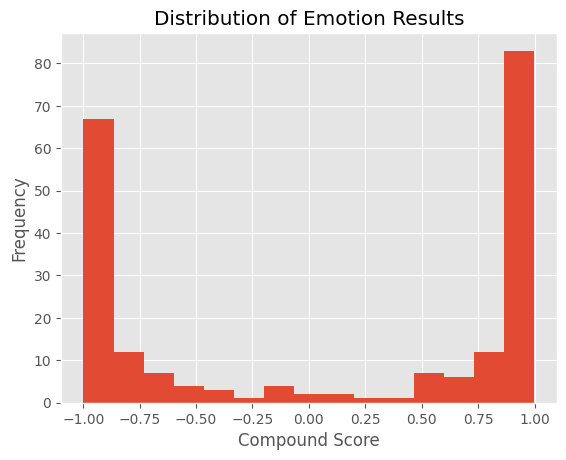

In [17]:
plt.hist(jovenes['compound'], bins=15)
plt.title('Distribution of Emotion Results')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Clearly visualized the high standard deviation in the youth group.**

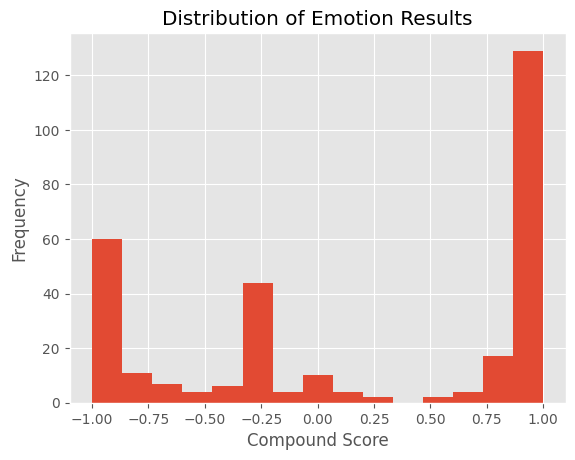

In [18]:
plt.hist(adultos['compound'], bins=15)
plt.title('Distribution of Emotion Results')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Still a high standard deviation in the adult group, but less than de youth group.**

In [19]:
prom = vaders.groupby('Years lived')['compound'].mean().reset_index()
prom['compound Std Dev'] = vaders.groupby('Years lived')['compound'].var().reset_index()['compound']
prom

,Years lived,compound,compound Std Dev
0,20,-0.876812,0.187392
1,22,-0.460460,0.479880
2,23,-0.280658,0.639936
3,25,0.212313,0.792091
4,27,0.258164,0.704321
5,28,0.333749,0.771586
6,30,-0.291160,0.591134
7,31,-0.414223,0.701347
8,33,0.172434,0.379149
9,34,-0.045042,0.255260


In [20]:
artist_scores = pd.merge(prom, conteo_artistas_edad, on='Years lived', how='left')
artist_scores = pd.merge(artist_scores, df_conteo_years_lived, on='Years lived', how='left')
artist_scores

,Years lived,compound,compound Std Dev,Count of Unique Artists,Number of Songs
0,20,-0.876812,0.187392,1,17
1,22,-0.460460,0.479880,1,15
2,23,-0.280658,0.639936,1,19
3,25,0.212313,0.792091,3,31
4,27,0.258164,0.704321,3,87
5,28,0.333749,0.771586,1,43
6,30,-0.291160,0.591134,1,5
7,31,-0.414223,0.701347,1,13
8,33,0.172434,0.379149,3,29
9,34,-0.045042,0.255260,3,19


In [21]:
bin_edges = [0, 5, 11, 17, 23, 29]

bin_labels = [f'Bin {i}' for i in range(1, len(bin_edges))]
artist_scores['Bin'] = pd.cut(artist_scores.index, bins=bin_edges, labels=bin_labels, include_lowest=True)


In [22]:
artist_scores

,Years lived,compound,compound Std Dev,Count of Unique Artists,Number of Songs,Bin
0,20,-0.876812,0.187392,1,17,Bin 1
1,22,-0.460460,0.479880,1,15,Bin 1
2,23,-0.280658,0.639936,1,19,Bin 1
3,25,0.212313,0.792091,3,31,Bin 1
4,27,0.258164,0.704321,3,87,Bin 1
5,28,0.333749,0.771586,1,43,Bin 1
6,30,-0.291160,0.591134,1,5,Bin 2
7,31,-0.414223,0.701347,1,13,Bin 2
8,33,0.172434,0.379149,3,29,Bin 2
9,34,-0.045042,0.255260,3,19,Bin 2


In [23]:
print(artist_scores.groupby('Bin')['compound'].mean())

Bin
Bin 1   -0.135617
Bin 2    0.099937
Bin 3    0.406632
Bin 4   -0.045035
Bin 5    0.177250
Name: compound, dtype: float64


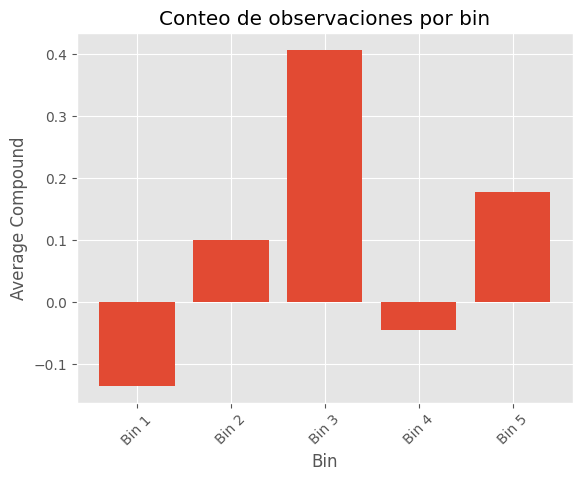

In [24]:
bin_values = artist_scores['Bin'].unique()
mean_compound = artist_scores.groupby('Bin')['compound'].mean()

plt.bar(bin_values, mean_compound)
plt.title('Conteo de observaciones por bin')
plt.xlabel('Bin')
plt.ylabel('Average Compound')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

**It seems an upward sloping for years binning, however is not consistent as bin increases. The smallest bin (youth bin) has the lowest average compound sentiment score. Bin 3 the highest.**

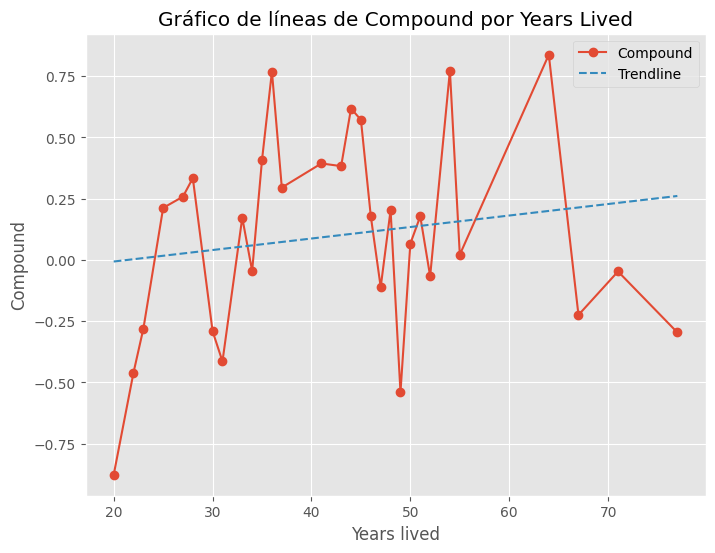

In [25]:
x = artist_scores['Years lived']
y = artist_scores['compound']

# Calculate trendline
m, b = np.polyfit(x, y, 1)
trendline_y = m * x + b

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Compound')
plt.plot(x, trendline_y, linestyle='--', label='Trendline')
plt.title('Gráfico de líneas de Compound por Years Lived')
plt.xlabel('Years lived')
plt.ylabel('Compound')
plt.legend()
plt.grid(True)
plt.show()

**Insignificant upward sloping. Living more does not mean that their songs have reflected more positive emotions, if analysed in the whole picture of years. However, the lack of data for some group of ages influence these results.**

In [26]:
vaders = vaders.dropna(subset=['Release date'])


In [27]:
vaders['Release Order'] = vaders.groupby('Artist')['Release date'].rank(method='dense').astype(int)

<ipython-input-27-7a1ef4e6c6b3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
jovenes = vaders[vaders['Years lived']<29]
adultos = vaders[(vaders['Years lived'] >= 40) & (vaders['Years lived'] <= 54)]

In [29]:
release_order = jovenes.groupby('Release Order')['compound'].mean().reset_index()

release_order_qty = jovenes.groupby('Release Order')['Song'].nunique().reset_index()

release_order_qty.columns = ['Release Order', 'Count of Songs']

release_order = pd.merge(release_order, release_order_qty, on='Release Order', how='left')
release_order

,Release Order,compound,Count of Songs
0,1,-0.047518,65
1,2,0.049812,59
2,3,0.175759,27
3,4,-0.002647,34
4,5,0.372514,21
5,6,0.497975,4
6,7,0.981200,1
7,8,0.946400,1


In [30]:
jov = jovenes[jovenes['Release Order']>5]
jov

,index,neg,neu,pos,compound,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics,Release Order
304,309,0.068,0.831,0.102,0.9812,Kim Jong-hyun,27,Don’t Call Me,No,Don't Call Me,2021.0,"[Intro: All, Key]\nI promise to tell the truth...",7
306,311,0.264,0.608,0.128,-0.9952,Kim Jong-hyun,27,Lonely,Yes,Story Op.2,2017.0,"[Verse 1: JONGHYUN, TAEYEON]\n""I'm sorry, it's...",6
309,314,0.235,0.511,0.254,0.9464,Kim Jong-hyun,27,HARD,No,Hard,2023.0,"\n[Verse 1: Taemin, Key, Onew]\nBring the fire...",8
328,333,0.061,0.527,0.413,0.9993,Dave Lepard,25,Better Be Cool,No,Better Be Cool,2023.0,Look at the faded candle\nStill burning in you...,6
587,598,0.055,0.726,0.220,0.9922,Sulli,25,Goblin,No,Goblin,2019.0,[Verse 1]\nPut the cube pieces in my head\nIt’...,6
592,603,0.035,0.744,0.221,0.9956,Sulli,25,On The Moon,No,Goblin,2019.0,Go up on the moon\nWhy do you look so blue?\nB...,6


**Just 3 young artists lived made more than 5 albums.**

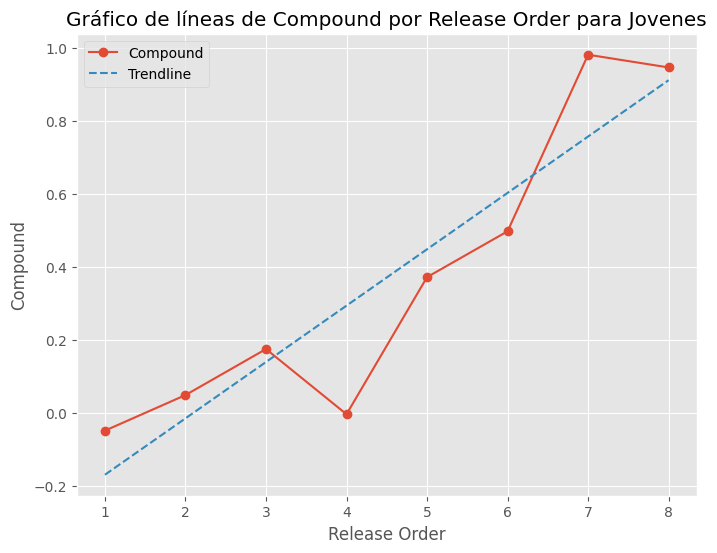

In [31]:
x_release_order = release_order['Release Order']
y_compound = release_order['compound']

# Calculate trendline
m, b = np.polyfit(x_release_order, y_compound, 1)
trendline_y = m * x_release_order + b

plt.figure(figsize=(8, 6))
plt.plot(x_release_order, y_compound, marker='o', linestyle='-', label='Compound')
plt.plot(x_release_order, trendline_y, linestyle='--', label='Trendline')
plt.title('Gráfico de líneas de Compound por Release Order para Jovenes')
plt.xlabel('Release Order')
plt.ylabel('Compound')
plt.legend()
plt.grid(True)
plt.show()

**It seems that as the artist releases more albums the average sentiment per album number released increases. However, there is little data on album numbers 6, 7 and 8 of the young artists who lived.**

In [32]:
release_order = adultos.groupby('Release Order')['compound'].mean().reset_index()

release_order_qty = adultos.groupby('Release Order')['Song'].nunique().reset_index()

release_order_qty.columns = ['Release Order', 'Count of Songs']

release_order = pd.merge(release_order, release_order_qty, on='Release Order', how='left')
release_order

,Release Order,compound,Count of Songs
0,1,0.272119,53
1,2,0.203441,40
2,3,0.190767,52
3,4,0.052178,51
4,5,0.183219,40
5,6,0.681964,14
6,7,0.474308,13
7,8,0.665183,6
8,9,-0.684517,6
9,10,-0.458617,6


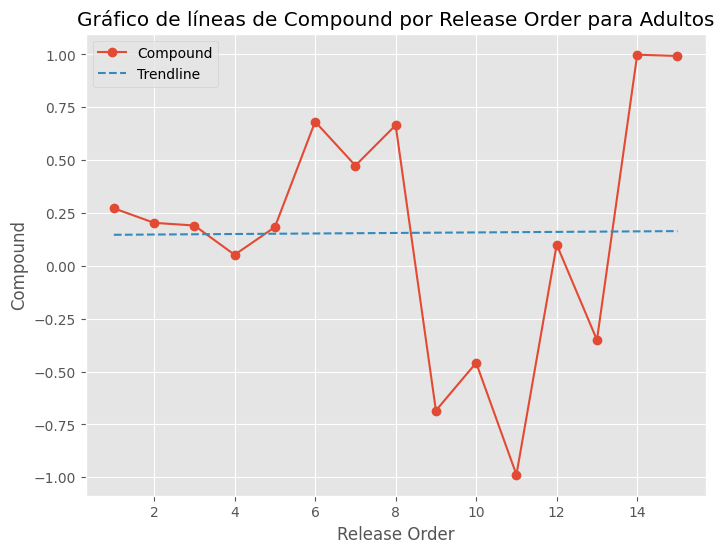

In [33]:
x_release_order = release_order['Release Order']
y_compound = release_order['compound']

# Calculate trendline
m, b = np.polyfit(x_release_order, y_compound, 1)
trendline_y = m * x_release_order + b

plt.figure(figsize=(8, 6))
plt.plot(x_release_order, y_compound, marker='o', linestyle='-', label='Compound')
plt.plot(x_release_order, trendline_y, linestyle='--', label='Trendline')
plt.title('Gráfico de líneas de Compound por Release Order para Adultos')
plt.xlabel('Release Order')
plt.ylabel('Compound')
plt.legend()
plt.grid(True)
plt.show()

**In spite of an upword sloping, it can't be said with same security the previous conclusions**

# Solo personal songs

In [34]:
personal_songs = vaders[vaders['Personal  Song']=='Yes']
personal_songs

,index,neg,neu,pos,compound,Artist,Years lived,Song,Personal Song,Album,Release date,Lyrics,Release Order
95,100,0.688,0.312,0.000,-0.2960,Luciano cilio,33,Primo quadro della conoscenza,Yes,Dell'universo assente,1977.0,No Lyrics,1
104,109,0.072,0.819,0.109,0.6854,Chris Cornell,52,Can't Change Me,Yes,Euphoria Morning,1999.0,She can do anything at all\nHave anything she ...,6
105,110,0.044,0.772,0.185,0.9958,Chris Cornell,52,"Preaching the End of the World,",Yes,Euphoria Morning,1999.0,"Hello, I know there's someone out there who ca...",6
106,111,0.099,0.595,0.305,0.9958,Chris Cornell,52,Sunshower,Yes,Euphoria Morning,1999.0,"Dark as roses, and fine as sand\nI feel your h...",6
107,112,0.247,0.664,0.089,-0.9969,Chris Cornell,52,You Know My Name,Yes,Carry On,2007.0,If you take a life do you know what you'll giv...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,737,0.269,0.714,0.016,-0.9986,Avicii,28,Lonely Together,Yes,AVĪCI (01),2017.0,It's you and your world\nAnd I'm caught in the...,3
727,738,0.031,0.704,0.265,0.9977,Avicii,28,You Be Love,Yes,AVĪCI (01),2017.0,You can be the potter\nI'll be the clay\nYou c...,3
728,739,0.059,0.781,0.160,0.9736,Avicii,28,Without You,Yes,AVĪCI (01),2017.0,You said that we would always be\nWithout you ...,3
729,740,0.105,0.821,0.074,-0.7912,Avicii,28,What Would I Change It To,Yes,AVĪCI (01),2017.0,Steady yourself even though you've only been f...,3


In [35]:
prom_personal_songs = personal_songs.groupby('Years lived')['compound'].mean().reset_index()
prom_personal_songs

,Years lived,compound
0,20,-0.876812
1,27,-0.005650
2,28,0.333749
3,33,0.267600
4,34,-0.158562
5,35,0.539275
6,37,0.386852
7,41,0.318388
8,43,0.742867
9,44,0.617938


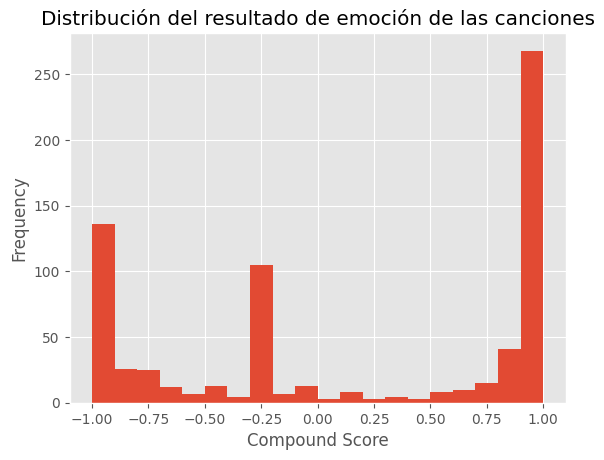

In [36]:
plt.hist(vaders['compound'], bins=20)
plt.title('Distribución del resultado de emoción de las canciones')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**High standard overall deviation of song's sentiment.**

In [37]:
artist_scores.to_excel('artistas_score.xlsx', index=False)
prom_personal_songs.to_excel('artistas_score_personals.xlsx', index=False)